<a href="https://colab.research.google.com/github/kaidhoffmann/genIAL/blob/main/plot_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
import pandas as pd
import numpy as np

# install latex

In [3]:
!apt install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x libavalon-framework-

# download data and unzip

In [4]:
# ! gdown 1X_dKwoPWkNg3eWAh_qiWl6U81st5OK5y
#new version, including sdss red-red, bleu-blue auto correlations, rest should be same as in previous version
! gdown 1nJCUBJGAxjcXzzdqroVCHI9h_27F157t

Downloading...
From: https://drive.google.com/uc?id=1nJCUBJGAxjcXzzdqroVCHI9h_27F157t
To: /content/correlations.zip
100% 14.9k/14.9k [00:00<00:00, 32.5MB/s]


In [5]:
! unzip correlations.zip

Archive:  correlations.zip
   creating: correlations/
  inflating: correlations/corr_hagn-z1p0m1.csv  
  inflating: correlations/corr_hagn-z1p0m2.csv  
  inflating: correlations/corr_hagn-z1p0m3.csv  
  inflating: correlations/corr_lowz-l3.csv  
  inflating: correlations/corr_lowz-l1.csv  
  inflating: correlations/corr_lowz-l2.csv  
  inflating: correlations/corr_lowz-l4.csv  
  inflating: correlations/corr_sdss-red.csv  
  inflating: correlations/corr_sdss-blue.csv  
  inflating: correlations/corr_hagn-z1p0m1_calibration.csv  
  inflating: correlations/corr_hagn-z1p0m2_calibration.csv  
  inflating: correlations/corr_hagn-z1p0m3_calibration.csv  
  inflating: correlations/corr_lowz-l2_ref.csv  
  inflating: correlations/corr_lowz-l1_ref.csv  
  inflating: correlations/corr_lowz-l3_ref.csv  
  inflating: correlations/corr_lowz-l4_ref.csv  
  inflating: correlations/corr_sdss-red_ref.csv  
  inflating: correlations/corr_sdss-blue_ref.csv  
  inflating: correlations/corr_hagn-z1p0m1_ref

# read data into dictionaries

In [6]:
corr_obs = {'lowz-l1':[],
            'lowz-l2':[],
            'lowz-l3':[],
            'lowz-l4':[],
            'sdss-red':[],
            'sdss-blue':[],
            'sdss-red-red':[],
            'sdss-blue-blue':[],
            }

corr_obs_ref = {'lowz-l1_ref':[],
            'lowz-l2_ref':[],
            'lowz-l3_ref':[],
            'lowz-l4_ref':[],
            'sdss-red_ref':[],
            'sdss-blue_ref':[],
            }


corr_hagn = {'hagn-z1p0m1':[],
             'hagn-z1p0m2':[],
             'hagn-z1p0m3':[],
            }

corr_hagn_ref = {'hagn-z1p0m1_ref':[],
             'hagn-z1p0m2_ref':[],
             'hagn-z1p0m3_ref':[],
            }


In [7]:
def read_correlations(dir_corr, dict_corr):

  for key in dict_corr:
    fname = dir_corr + 'corr_' + key + '.csv'
    dict_corr[key] = pd.read_csv(fname, sep = ',')

  return dict_corr

In [8]:
dir_corr = 'correlations/'

corr_obs = read_correlations(dir_corr, corr_obs)
corr_obs_ref = read_correlations(dir_corr, corr_obs_ref)

corr_hagn = read_correlations(dir_corr, corr_hagn)
corr_hagn_ref = read_correlations(dir_corr, corr_hagn_ref)

In [9]:
#corr_obs['lowz-l1']
corr_hagn['hagn-z1p0m1']

,# bin,r,counts,r12_v1a,r12_v1a_std,r12_v1b,r12_v1b_std
0,0,0.134928,12520,0.507753,0.003290,0.493285,0.004029
1,1,0.245646,23725,0.504897,0.001957,0.494070,0.003729
2,2,0.447214,48239,0.512466,0.003267,0.488259,0.002444
3,3,0.814181,102634,0.516674,0.002908,0.486943,0.001507
4,4,1.482269,200035,0.521674,0.002449,0.480601,0.002166
5,5,2.698566,427658,0.523165,0.001764,0.478718,0.001124
6,6,4.912912,1181343,0.517298,0.002322,0.483868,0.001586
7,7,8.944272,4189178,0.509731,0.000891,0.491129,0.001152
8,8,16.283621,15795835,0.504956,0.000709,0.494792,0.001117
9,9,29.645378,50490184,0.503186,0.001347,0.497979,0.001262


# plot $w_{gg}$

In [10]:
corr_obs_ref['lowz-l1_ref']

,rp,wgg,wggerr,wgp,wgperr
0,0.11777,2991.97000,182.07900,57.21170,15.27810
1,0.15961,2263.12000,115.89700,36.45080,10.31620
2,0.21632,1628.53000,72.83760,23.19060,6.00115
3,0.29319,989.10300,41.16550,13.00510,4.12412
4,0.39736,719.16800,32.46680,12.18910,2.25285
5,0.53855,454.11400,21.42230,6.74997,1.97219
6,0.72991,317.56100,14.02170,5.59978,1.17006
7,0.98925,219.48100,9.43570,1.64470,0.78555
8,1.34075,155.00300,6.68601,2.06310,0.53740
9,1.81715,122.67200,5.56494,1.21641,0.37788


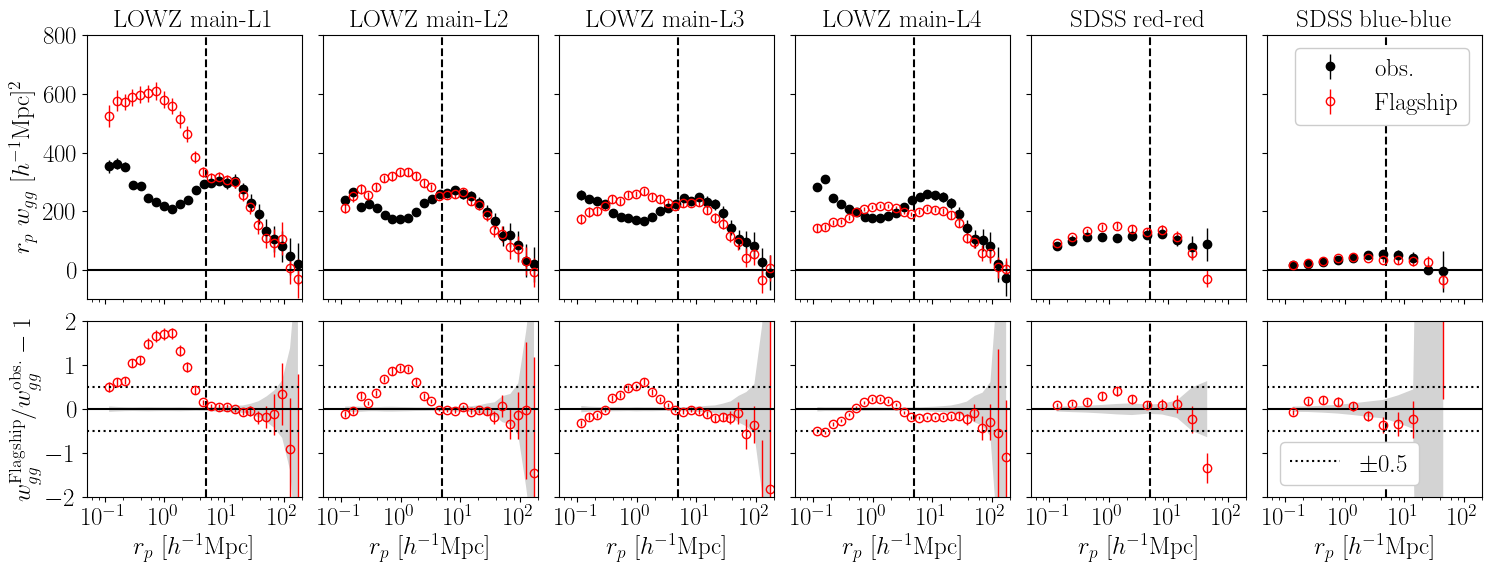

In [59]:


# use here auto-correlations of color-subsamples for sdss, since those were the ones used by Johnston19
keys = ['lowz-l1', 'lowz-l2', 'lowz-l3', 'lowz-l4', 'sdss-red-red', 'sdss-blue-blue']
corr = []
for key in keys:
 corr.append(corr_obs[key])

keys_ref = ['lowz-l1_ref', 'lowz-l2_ref', 'lowz-l3_ref', 'lowz-l4_ref', 'sdss-red_ref', 'sdss-blue_ref']
corr_ref = []
for key in keys_ref:
  corr_ref.append(corr_obs_ref[key])

Ncol = len(keys)

fig, ax = plt.subplots(2,Ncol,figsize=(Ncol*3,6), sharex=True, sharey='row', gridspec_kw={'height_ratios': [3, 2]})

fontsize = 18

# ============ wgg ==============
row = 0

for i in range(Ncol):

  #reference
  ax[row,i].errorbar(corr_ref[i].rp,
                     corr_ref[i].rp*corr_ref[i].wgg,
                     corr_ref[i].rp*corr_ref[i].wggerr,
                     color='k',linestyle='', lw=1, label='obs.', marker='o')

  #FS2
  ax[row,i].errorbar(corr[i].rp,
                     corr[i].rp*corr[i].wgg,
                     corr[i].rp*corr[i].wggerr,
                     color='r',linestyle='', lw=1, label='Flagship', marker='o', fillstyle='none')

# ============ wgg_sim / wgg_obs -1 ==============
row = 1

for i in range(Ncol):

  ax[row,i].fill_between(
                    corr_ref[i].rp,
                    -corr_ref[i].wggerr / abs(corr_ref[i].wgg),
                    corr_ref[i].wggerr / abs(corr_ref[i].wgg),
                    facecolor='lightgrey', interpolate=True)

  ax[row,i].errorbar(corr[i].rp,
                     corr[i].wgg / corr_ref[i].wgg-1,
                     corr[i].wggerr / abs(corr_ref[i].wgg),
                     color='r',linestyle='', lw=1, label='', marker='o', fillstyle='none')

# ================== config. ================
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=True)

# set spacing between panels
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# axis labels
ax[0,0].set_ylabel(r'$r_p \ w_{gg} \ [h^{-1}\textrm{Mpc}]^2$',fontsize=fontsize)
ax[1,0].set_ylabel(r'$w_{gg}^{\mathrm{Flagship}} / w_{gg}^{\mathrm{obs.}} - 1$',fontsize=fontsize)
#ax[1,0].set_ylabel(r'$\frac{w_{gg}^{FS2}}{w_{gg}^{obs.}} - 1$',fontsize=fontsize)

#titles
titles = ['LOWZ main-L1', 'LOWZ main-L2', 'LOWZ main-L3', 'LOWZ main-L4', 'SDSS red-red', 'SDSS blue-blue']
for i in range(Ncol):
  ax[0,i].set_title(titles[i],fontsize=fontsize)


# set y-tics
ax[1,0].set_yticks(np.arange(-200, 1000, step=200))#top row
ax[1,0].set_yticks(np.arange(-10, 10, step=1))#bottom row


#settings for all columns
for col in range(Ncol):

  x_vline = 5
  row=0
  ax[row,col].set_ylim(-100,800)
  ax[row,col].axvline(x=x_vline, c='k', ls='--')

  row=1
  ax[row,col].set_ylim(-2,2)
  ax[row,col].axhline(y=-0.5, c='k', ls=':', label='$\pm 0.5$')
  ax[row,col].axhline(y=0.5, c='k', ls=':')
  ax[row,col].axvline(x=x_vline, c='k', ls='--')
  ax[row,col].set_xlabel(r'$r_p \ [h^{-1}\textrm{Mpc}]$',fontsize=fontsize)

  for row in range(2):

    ax[row,col].set_xlim(0.05,200)
    ax[row,col].set_xscale('log')
    ax[row,col].axhline(y=0, c='k', ls='-')
    #see https://matplotlib.org/stable/gallery/ticks/tick-locators.html
    ax[row, col].xaxis.get_major_locator().set_params(base=10,numticks=10)
    ax[row, col].xaxis.get_minor_locator().set_params(numticks=10, subs=[.2, .4, .6, .8])
    ax[row,col].tick_params(axis='both',labelsize=fontsize)

# set legend
ax[1,-1].legend(fontsize=fontsize, framealpha=1)
ax[0,-1].legend(fontsize=fontsize, framealpha=1)


plt.savefig("wgg_fs2_vs_obs.pdf",bbox_inches='tight', pad_inches = 0.1)
plt.show()

# plot $w_{g+}$

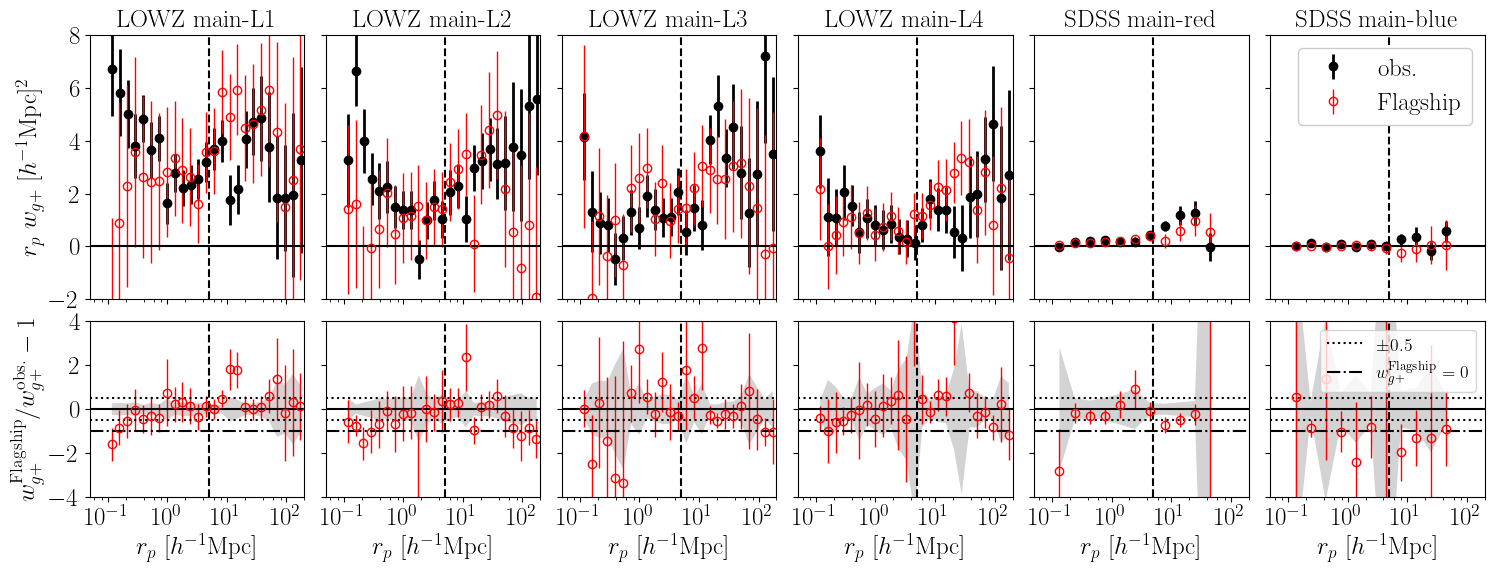

In [61]:


# use here cross-correlations between sdss main and sdss color-subsamples to compare against Jpohnston 2019
keys = ['lowz-l1', 'lowz-l2', 'lowz-l3', 'lowz-l4', 'sdss-red', 'sdss-blue']
corr = []
for key in keys:
 corr.append(corr_obs[key])

keys_ref = ['lowz-l1_ref', 'lowz-l2_ref', 'lowz-l3_ref', 'lowz-l4_ref', 'sdss-red_ref', 'sdss-blue_ref']
corr_ref = []
for key in keys_ref:
  corr_ref.append(corr_obs_ref[key])

Ncol = len(keys)

fig, ax = plt.subplots(2,Ncol,figsize=(Ncol*3,6), sharex=True, sharey='row', gridspec_kw={'height_ratios': [3, 2]})

fontsize = 18


# ============ wgp ==============
row = 0

for i in range(Ncol):

  #reference
  ax[row,i].errorbar(corr_ref[i].rp,
                     corr_ref[i].rp*corr_ref[i].wgp,
                     corr_ref[i].rp*corr_ref[i].wgperr,
                     color='k',linestyle='', lw=2, label='obs.', marker='o')

  #FS2
  ax[row,i].errorbar(corr[i].rp,
                     corr[i].rp*corr[i].wgp,
                     corr[i].rp*corr[i].wgperr,
                     color='r',linestyle='', lw=1, label='Flagship', marker='o', fillstyle='none')



# ============ wgp_sim / wgp_obs -1 ==============
row = 1

for i in range(Ncol):

  ax[row,i].fill_between(
                    corr_ref[i].rp,
                    -corr_ref[i].wgperr / abs(corr_ref[i].wgp),
                    corr_ref[i].wgperr / abs(corr_ref[i].wgp),
                    facecolor='lightgrey', interpolate=True)

  ax[row,i].errorbar(corr[i].rp,
                     corr[i].wgp / corr_ref[i].wgp-1,
                     corr[i].wgperr / abs(corr_ref[i].wgp),
                     color='r',linestyle='', lw=1, label='', marker='o', fillstyle='none')



# ================== config. ================
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=True)

# set spacing between panels
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# axis labels
ax[0,0].set_ylabel(r'$r_p \ w_{g+} \ [h^{-1}\textrm{Mpc}]^2$',fontsize=fontsize)
ax[1,0].set_ylabel(r'$w_{g+}^{\mathrm{Flagship}} / w_{g+}^{\mathrm{obs.}} - 1$',fontsize=fontsize)
#ax[1,0].set_ylabel(r'$\frac{w_{g+}^{FS2}}{w_{g+}^{obs.}} - 1$',fontsize=fontsize)

#titles
titles = ['LOWZ main-L1', 'LOWZ main-L2', 'LOWZ main-L3', 'LOWZ main-L4', 'SDSS main-red', 'SDSS main-blue']
for i in range(Ncol):
  ax[0,i].set_title(titles[i],fontsize=fontsize)


# set y-tics
ax[1,0].set_yticks(np.arange(-20, 100, step=20))#top row
ax[1,0].set_yticks(np.arange(-10, 10, step=2))#bottom row


#settings for all columns
for col in range(Ncol):

  x_vline = 5

  row=0
  ax[row,col].set_ylim(-2,8)
  ax[row,col].axvline(x=x_vline, c='k', ls='--')

  row=1
  ax[row,col].set_ylim(-4,4)
  ax[row,col].axhline(y=-0.5, c='k', ls=':', label='$\pm 0.5$')
  ax[row,col].axhline(y=0.5, c='k', ls=':')
  ax[row,col].axvline(x=x_vline, c='k', ls='--')
  ax[row,col].set_xlabel(r'$r_p \ [h^{-1}\textrm{Mpc}]$',fontsize=fontsize)

  ax[1,col].axhline(y=-1, c='k', ls='-.', label='$w_{g+}^{\mathrm{Flagship}}=0$')
  ax[0,col].axhline(y=0, c='k', ls='-')
  ax[1,col].axhline(y=0, c='k', ls='-')

  for row in range(2):

    ax[row,col].set_xlim(0.05,200)
    ax[row,col].set_xscale('log')
    #see https://matplotlib.org/stable/gallery/ticks/tick-locators.html
    ax[row, col].xaxis.get_major_locator().set_params(base=10,numticks=10)
    ax[row, col].xaxis.get_minor_locator().set_params(numticks=10, subs=[.2, .4, .6, .8])
    ax[row,col].tick_params(axis='both',labelsize=fontsize)

#out legend in last column
ax[0,-1].legend(fontsize=fontsize, framealpha=1)
ax[1,-1].legend(fontsize=fontsize*0.7)

plt.savefig("wgp_fs2_vs_obs.pdf",bbox_inches='tight', pad_inches = 0.1)
plt.show()

# download plots

In [39]:
from google.colab import files

In [62]:
files.download("wgg_fs2_vs_obs.pdf")
files.download("wgp_fs2_vs_obs.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# plot $\eta$

In [16]:
corr_hagn['hagn-z1p0m1']

,# bin,r,counts,r12_v1a,r12_v1a_std,r12_v1b,r12_v1b_std
0,0,0.134928,12520,0.507753,0.003290,0.493285,0.004029
1,1,0.245646,23725,0.504897,0.001957,0.494070,0.003729
2,2,0.447214,48239,0.512466,0.003267,0.488259,0.002444
3,3,0.814181,102634,0.516674,0.002908,0.486943,0.001507
4,4,1.482269,200035,0.521674,0.002449,0.480601,0.002166
5,5,2.698566,427658,0.523165,0.001764,0.478718,0.001124
6,6,4.912912,1181343,0.517298,0.002322,0.483868,0.001586
7,7,8.944272,4189178,0.509731,0.000891,0.491129,0.001152
8,8,16.283621,15795835,0.504956,0.000709,0.494792,0.001117
9,9,29.645378,50490184,0.503186,0.001347,0.497979,0.001262


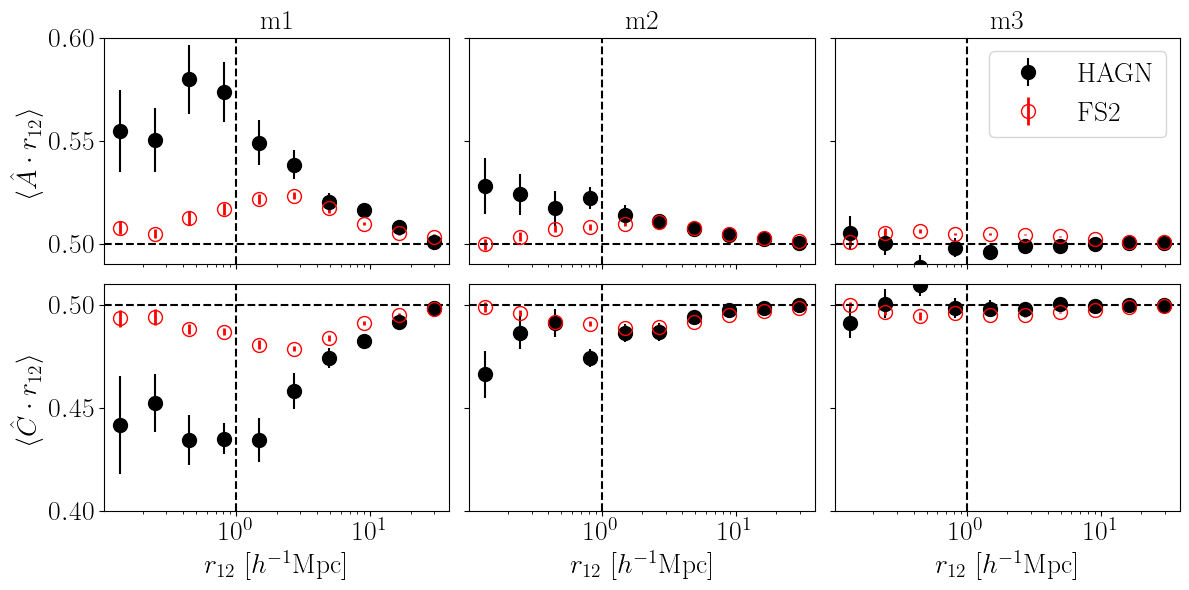

In [17]:
Ncol = len(corr_hagn)

fig, ax = plt.subplots(2,Ncol,figsize=(12,6), sharex=True, sharey='row')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

fontsize=20
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('text', usetex=True)


#put correlations in list
corr = []
for key in corr_hagn:
  corr.append(corr_hagn[key])

corr_ref = []
for key in corr_hagn_ref:
  corr_ref.append(corr_hagn_ref[key])

#============== plt correlations =============
col = 0

for i in range(Ncol):

  ax[0,i].errorbar(corr_ref[i].r, corr_ref[i].r12_v1a, corr_ref[i].r12_v1a_std, c='k', marker='o', ms=10, ls='', label='HAGN')
  ax[1,i].errorbar(corr_ref[i].r, corr_ref[i].r12_v1b, corr_ref[i].r12_v1b_std, c='k', marker='o', ms=10, ls='', label='HAGN')

  ax[0,i].errorbar(corr[i].r, corr[i].r12_v1a, corr[i].r12_v1a_std, c='r', marker='o', lw=2, ms=10, fillstyle='none', ls='', label='FS2')
  ax[1,i].errorbar(corr[i].r, corr[i].r12_v1b, corr[i].r12_v1b_std, c='r', marker='o', lw=2, ms=10, fillstyle='none', ls='', label='FS2')


ax[0,0].set_ylabel(r'$\langle \hat A \cdot r_{12} \rangle$',fontsize=fontsize)
ax[1,0].set_ylabel(r'$\langle \hat C \cdot  r_{12} \rangle$',fontsize=fontsize)


#============ config ===========

titles = ['m1', 'm2', 'm3']

for i in range(Ncol):

    ax[0,i].set_title(titles[i], fontsize = fontsize)

    ax[1,i].set_xlabel(r'$r_{12} \ [h^{-1} \textrm{Mpc}]$', fontsize = fontsize)

    ax[0,i].set_ylim(0.49,0.6)
    ax[1,i].set_ylim(0.4,0.51)

    for j in range(2):
        ax[j,i].set_xscale('log')
        #ax[j,i].set_yscale('log')
        ax[j,i].tick_params(axis='both',labelsize=fontsize)
        ax[j,i].axhline(y=0.5, c='k', linestyle='--')

        #ax[j,i].axvline(x=0.2, c='b', ls='-')
        #ax[j,i].axvline(x=0.5, c='b', ls='--')
        #ax[j,i].axvline(x=1.0, c='b', ls='-')

        ax[j,i].axvline(x=1.0, c='k', ls='--')
        #ax[j,i].axvline(x=40.0, c='r', ls='-')

ax[0,-1].legend(loc='upper right', fontsize = fontsize)

plt.tight_layout()
plt.savefig('eta_fs2_vs_hagn.pdf', bbox_inches='tight',transparent=False, pad_inches=0.2)
plt.show()

plt.show()

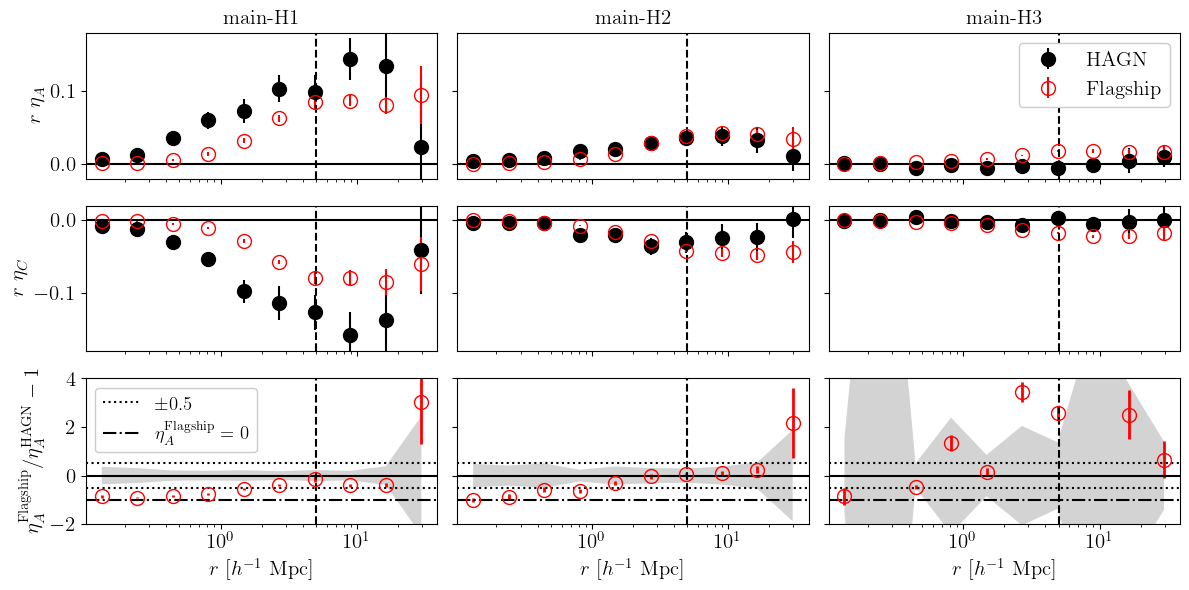

In [65]:
import matplotlib.pyplot as plt

# Assume Ncol, corr_hagn, corr_hagn_ref, corr, and corr_ref are already defined

Ncol = len(corr_hagn)

# Update the figure to have 3 rows now
fig, ax = plt.subplots(3, Ncol, figsize=(12, 6), sharex=True, sharey='row')

plt.subplots_adjust(wspace=0.1, hspace=0.15)

fontsize = 15
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('text', usetex=True)

# Put correlations in list (already done in your script)
corr = [corr_hagn[key] for key in corr_hagn]
corr_ref = [corr_hagn_ref[key] for key in corr_hagn_ref]

exp = 1.0

# ============== plt correlations =============
for i in range(Ncol):

    r_ref = corr_ref[i].r
    corrA_ref = corr_ref[i].r12_v1a - 0.5
    corrB_ref = corr_ref[i].r12_v1b - 0.5
    stdA_ref = corr_ref[i].r12_v1a_std
    stdB_ref = corr_ref[i].r12_v1b_std

    r = corr_ref[i].r
    corrA = corr[i].r12_v1a - 0.5
    corrB = corr[i].r12_v1b - 0.5
    stdA = corr[i].r12_v1a_std
    stdB = corr[i].r12_v1b_std

    # HAGN
    ax[0, i].errorbar(r_ref, r_ref**exp * corrA_ref, r_ref**exp * stdA_ref,
                      c='k', marker='o', ms=10, ls='', label='HAGN')
    ax[1, i].errorbar(r_ref, r_ref**exp * corrB_ref, r_ref**exp * stdB_ref,
                      c='k', marker='o', ms=10, ls='', label='HAGN')

    # Flagship
    ax[0, i].errorbar(r, r**exp * corrA, r * stdA,
                      c='r', marker='o', ms=10, fillstyle='none', ls='', label='Flagship')
    ax[1, i].errorbar(r, r**exp * corrB, r * stdB,
                      c='r', marker='o', ms=10, fillstyle='none', ls='', label='Flagship')


    # plot normalized reference errors as grey area around y=zero
    # Flagship error / HAGN - 1
    ax[2,i].fill_between(
                      r_ref, - stdA_ref / abs(corrA_ref), stdA_ref / abs(corrA_ref),
                      facecolor='lightgrey', interpolate=True)


    # Flagship / HAGN - 1
    ax[2,i].errorbar(r, corrA / abs(corrA_ref)-1, stdA / abs(corrA_ref),
                     color='r',linestyle='', lw=2, ms=10, label='', marker='o', fillstyle='none')

# ============= Set labels and titles ===========
ax[0, 0].set_ylabel(r'$r \ \eta_A$', fontsize=fontsize)
ax[1, 0].set_ylabel(r'$r \ \eta_C$', fontsize=fontsize)
ax[2, 0].set_ylabel(r'$\eta_A^{\mathrm{Flagship}} / \eta_A^{\mathrm{HAGN}} - 1$', fontsize=fontsize)

# ============ Configure plots =============
titles = ['main-H1', 'main-H2', 'main-H3']
for i in range(Ncol):
    ax[0, i].set_title(titles[i], fontsize=fontsize)
    ax[2, i].set_xlabel(r'$r \ [h^{-1} \ \mathrm{Mpc}]$', fontsize=fontsize)


    # Set y-limits for the first two rows
    ax[0, i].set_ylim(-0.02, 0.18)
    ax[1, i].set_ylim(-0.18, 0.02)
    ax[2, i].set_ylim(-2, 4)  # Adjust as needed for your data

    ax[2,i].axhline(y=-0.5, c='k', ls=':', label='$\pm 0.5$')
    ax[2,i].axhline(y=0.5, c='k', ls=':')
    ax[2,i].axhline(y=-1, c='k', ls='-.', label='$\eta_A^{\mathrm{Flagship}}=0$')

    for j in range(3):  # Now iterating over 3 rows
        ax[j, i].set_xscale('log')
        ax[j, i].tick_params(axis='both', labelsize=fontsize)
        ax[j, i].axhline(y=0.0, c='k', linestyle='-')
        ax[j, i].axvline(x=5.0, c='k', ls='--')

ax[0, -1].legend(loc='upper right', fontsize=fontsize, framealpha=1)
ax[2, 0].legend(loc='upper left', fontsize=fontsize*0.9, framealpha=1, frameon=True)

plt.savefig('eta_fs2_vs_hagn.pdf', bbox_inches='tight',transparent=False, pad_inches=0.2)


plt.tight_layout()
plt.show()


In [66]:
files.download("eta_fs2_vs_hagn.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>